In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
plt.style.use('default')
sns.set_palette("husl")

In [3]:
def load_csv_data():
    data_path = 'simulation_results/clean_data/'
    
    data = {
        'pid': {
            'nominal': pd.read_csv(f'{data_path}results_pid_nominal.csv'),
            'noise': pd.read_csv(f'{data_path}results_pid_with_noise.csv'),
            'disturbances': pd.read_csv(f'{data_path}results_pid_with_disturbances.csv')
        },
        'onoff': {
            'nominal': pd.read_csv(f'{data_path}results_onoff_nominal.csv'),
            'noise': pd.read_csv(f'{data_path}results_onoff_with_noise.csv'),
            'disturbances': pd.read_csv(f'{data_path}results_onoff_with_disturbances.csv')
        },
        'fuzzy': {
            'nominal': pd.read_csv(f'{data_path}results_fuzzy_nominal.csv'),
            'noise': pd.read_csv(f'{data_path}results_fuzzy_with_noise.csv'),
            'disturbances': pd.read_csv(f'{data_path}results_fuzzy_with_disturbances.csv')
        }
    }
    
    return data

In [4]:

def plot_controller_output_over_time(all_data, time_limit=None):
    scenarios = ['nominal', 'noise', 'disturbances']
    controllers = ['pid', 'onoff', 'fuzzy']
    scenario_titles = ['Nominal', 'With Noise', 'With Disturbances']
    controller_titles = ['PID', 'ON/OFF', 'Fuzzy']

    fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
    for i, scenario in enumerate(scenarios):
        for j, controller in enumerate(controllers):
            ax = axes[i, j]
            df = all_data[controller][scenario]
            if df.empty or 'heatSourcePower' not in df.columns or 'time' not in df.columns:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{controller_titles[j]} - {scenario_titles[i]}')
                continue
            # Optionally filter by time
            if time_limit:
                df = df[df['time'] <= time_limit]
            # Group by time and aggregate mean/std
            if 'simulation_run' in df.columns:
                grouped = df.groupby('time')['heatSourcePower']
                mean = grouped.mean()
                std = grouped.std()
                ax.plot(mean.index, mean.values, color='blue', label='Mean')
                ax.fill_between(mean.index, mean - std, mean + std, color='blue', alpha=0.2, label='Std Dev')
            else:
                ax.plot(df['time'], df['heatSourcePower'], color='blue', label='Output')
            ax.set_title(f'{controller_titles[j]} - {scenario_titles[i]}', fontsize=12)
            ax.set_xlabel('Time (s)' if i == 2 else '')
            ax.set_ylabel('Heat Source Power (W)' if j == 0 else '')
            ax.grid(True, alpha=0.3)
            if i == 0 and j == 2:
                ax.legend()
    plt.tight_layout()
    plt.suptitle('Controller Output Over Time', fontsize=16, y=1.05)
    
    # Create output directory
    os.makedirs('plots/output_distributions', exist_ok=True)
    plt.savefig('plots/output_distributions/output_over_time_grid.png', dpi=300, bbox_inches='tight')
    plt.show()


In [5]:
# def plot_output_distributions(all_data):
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
#     controllers = ['pid', 'onoff', 'fuzzy']
#     controller_titles = ['PID', 'ON/OFF', 'Fuzzy']
#     scenarios = ['nominal', 'noise', 'disturbances']
#     scenario_colors = {'nominal': 'skyblue', 'noise': 'salmon', 'disturbances': 'lightgreen'}
    
#     for j, controller in enumerate(controllers):
#         ax = axes[j]
        
#         # Collect all output values for each scenario
#         for scenario in scenarios:
#             data = all_data[controller][scenario]
            
#             if 'heatSourcePower' in data.columns:
#                 all_outputs = data['heatSourcePower'].dropna().values
                
#                 # Plot histogram
#                 if len(all_outputs) > 0:
#                     ax.hist(all_outputs, bins=50, alpha=0.7, 
#                            color=scenario_colors[scenario], 
#                            label=scenario.capitalize(), 
#                            density=True, edgecolor='black', linewidth=0.5)
        
#         # Formatting
#         ax.set_title(f'{controller_titles[j]} Controller', fontsize=14, fontweight='bold')
#         ax.set_xlabel('Heat Source Power (W)')
#         ax.set_ylabel('Density' if j == 0 else '')
#         ax.legend()
#         ax.grid(True, alpha=0.3)
    
#     plt.tight_layout()
#     plt.suptitle('Distribution of Controller Outputs Across Scenarios', fontsize=16, y=1.02)
    
#     plt.savefig('plots/output_distributions/output_distributions.png', dpi=300, bbox_inches='tight')
#     plt.show()

def plot_output_distributions(all_data):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    controllers = ['pid', 'onoff', 'fuzzy']
    controller_titles = ['PID', 'ON/OFF', 'Fuzzy']
    scenarios = ['nominal', 'noise', 'disturbances']
    scenario_colors = {'nominal': 'skyblue', 'noise': 'salmon', 'disturbances': 'lightgreen'}
    
    for j, controller in enumerate(controllers):
        ax = axes[j]
        for scenario in scenarios:
            data = all_data[controller][scenario]
            if 'heatSourcePower' in data.columns:
                all_outputs = data['heatSourcePower'].dropna().values
                if len(all_outputs) > 0:
                    sns.kdeplot(all_outputs, ax=ax, color=scenario_colors[scenario],
                                label=scenario.capitalize(), fill=True, alpha=0.5, linewidth=2)
        ax.set_title(f'{controller_titles[j]} Controller', fontsize=14, fontweight='bold')
        ax.set_xlabel('Heat Source Power (W)')
        ax.set_ylabel('Density' if j == 0 else '')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.suptitle('Distribution of Controller Outputs Across Scenarios', fontsize=16, y=1.05)
    plt.savefig('plots/output_distributions/output_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

In [6]:
def plot_temperature_output_over_time(all_data, time_limit=None):
    scenarios = ['nominal', 'noise', 'disturbances']
    controllers = ['pid', 'onoff', 'fuzzy']
    scenario_titles = ['Nominal', 'With Noise', 'With Disturbances']
    controller_titles = ['PID', 'ON/OFF', 'Fuzzy']

    fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
    for i, scenario in enumerate(scenarios):
        for j, controller in enumerate(controllers):
            ax = axes[i, j]
            df = all_data[controller][scenario]
            if df.empty or 'temperatureSensor_T' not in df.columns or 'time' not in df.columns:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{controller_titles[j]} - {scenario_titles[i]}')
                continue
            if time_limit:
                df = df[df['time'] <= time_limit]
            if 'simulation_run' in df.columns:
                grouped = df.groupby('time')['temperatureSensor_T']
                mean = grouped.mean()
                std = grouped.std()
                ax.plot(mean.index, mean.values, color='green', label='Mean')
                ax.fill_between(mean.index, mean - std, mean + std, color='green', alpha=0.2, label='Std Dev')
            else:
                ax.plot(df['time'], df['temperatureSensor_T'], color='green', label='Temperature')
            ax.axhline(y=20.0, color='red', linestyle='--', alpha=0.8, label='Target (20°C)')
            ax.set_title(f'{controller_titles[j]} - {scenario_titles[i]}', fontsize=12)
            ax.set_xlabel('Time (s)' if i == 2 else '')
            ax.set_ylabel('Temperature (°C)' if j == 0 else '')
            ax.grid(True, alpha=0.3)
            if i == 0 and j == 2:
                ax.legend()
    plt.tight_layout()
    plt.suptitle('Temperature Sensor Output Over Time', fontsize=16, y=1.05)
    plt.savefig('plots/output_distributions/temperature_over_time_grid.png', dpi=300, bbox_inches='tight')
    plt.show()

In [7]:
# def plot_temperature_distributions(all_data):
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
#     controllers = ['pid', 'onoff', 'fuzzy']
#     controller_titles = ['PID', 'ON/OFF', 'Fuzzy']
#     scenarios = ['nominal', 'noise', 'disturbances']
#     scenario_colors = {'nominal': 'skyblue', 'noise': 'salmon', 'disturbances': 'lightgreen'}
    
#     for j, controller in enumerate(controllers):
#         ax = axes[j]
        
#         # Collect all temperature values for each scenario
#         for scenario in scenarios:
#             data = all_data[controller][scenario]
            
#             if 'temperatureSensor_T' in data.columns:
#                 all_temps = data['temperatureSensor_T'].dropna().values
                
#                 # Plot histogram
#                 if len(all_temps) > 0:
#                     ax.hist(all_temps, bins=50, alpha=0.7, 
#                            color=scenario_colors[scenario], 
#                            label=scenario.capitalize(), 
#                            density=True, edgecolor='black', linewidth=0.5)
        
#         ax.axvline(x=20.0, color='black', linestyle='--', alpha=0.8, label='Target (20°C)')
        
#         ax.set_title(f'{controller_titles[j]} Controller', fontsize=14, fontweight='bold')
#         ax.set_xlabel('Temperature (°C)')
#         ax.set_ylabel('Density' if j == 0 else '')
#         ax.legend()
#         ax.grid(True, alpha=0.3)
    
#     plt.tight_layout()
#     plt.suptitle('Distribution of Temperature Outputs Across Scenarios', fontsize=16, y=1.02)
#     plt.savefig('plots/output_distributions/temperature_distributions.png', dpi=300, bbox_inches='tight')
#     plt.show()


def plot_temperature_distributions(all_data):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))   
    controllers = ['pid', 'onoff', 'fuzzy']
    controller_titles = ['PID', 'ON/OFF', 'Fuzzy']
    scenarios = ['nominal', 'noise', 'disturbances']
    scenario_colors = {'nominal': 'skyblue', 'noise': 'salmon', 'disturbances': 'lightgreen'}
    
    for j, controller in enumerate(controllers):
        ax = axes[j]
        for scenario in scenarios:
            data = all_data[controller][scenario]
            if 'temperatureSensor_T' in data.columns:
                all_temps = data['temperatureSensor_T'].dropna().values
                if len(all_temps) > 0:
                    sns.kdeplot(all_temps, ax=ax, color=scenario_colors[scenario], 
                                label=scenario.capitalize(), fill=True, alpha=0.5, linewidth=2)
        ax.axvline(x=20.0, color='black', linestyle='--', alpha=0.8, label='Target (20°C)')
        ax.set_title(f'{controller_titles[j]} Controller', fontsize=14, fontweight='bold')
        ax.set_xlabel('Temperature (°C)')
        ax.set_ylabel('Density' if j == 0 else '')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.suptitle('Distribution of Temperature Outputs Across Scenarios', fontsize=16, y=1.05)
    plt.savefig('plots/output_distributions/temperature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

Plotting controller outputs over time


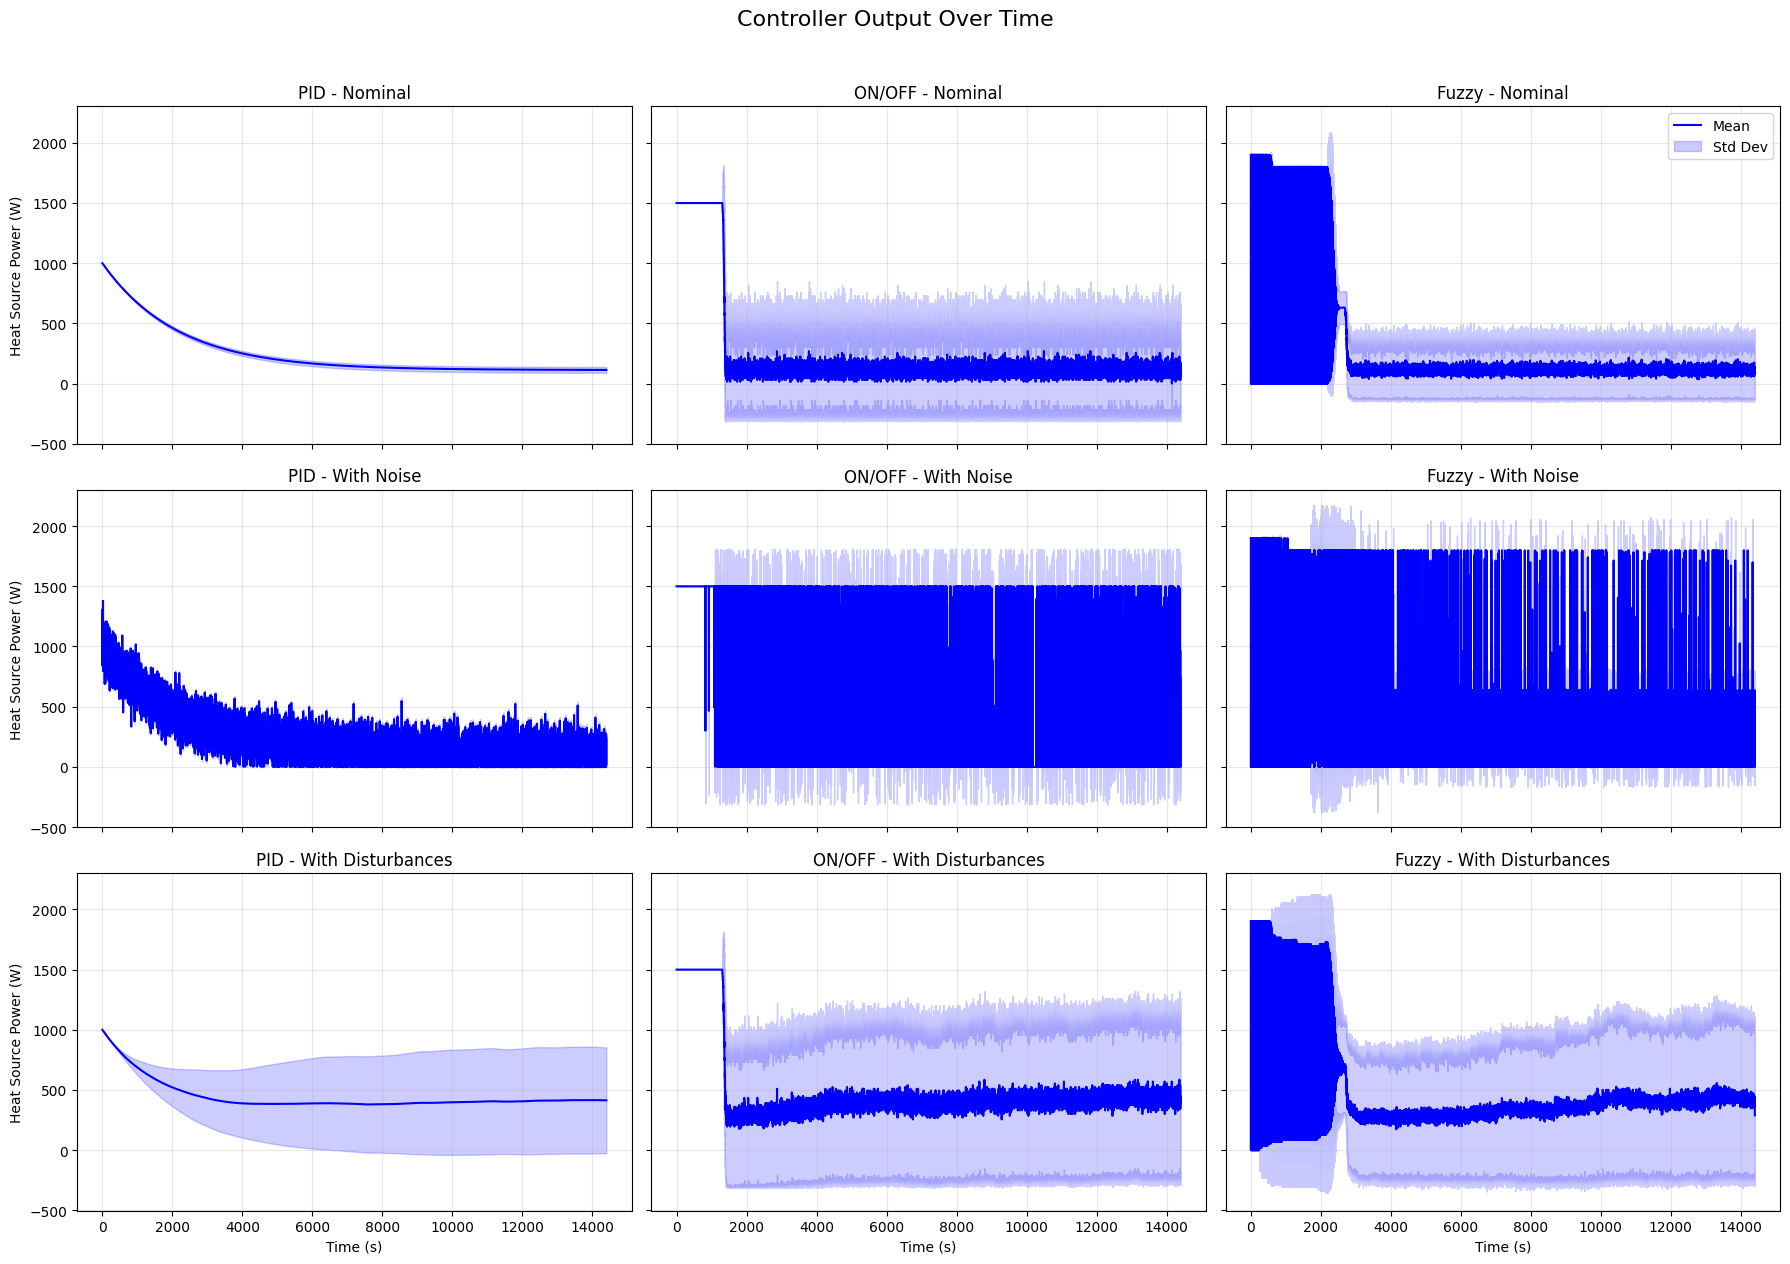

Plotting controller output distributions


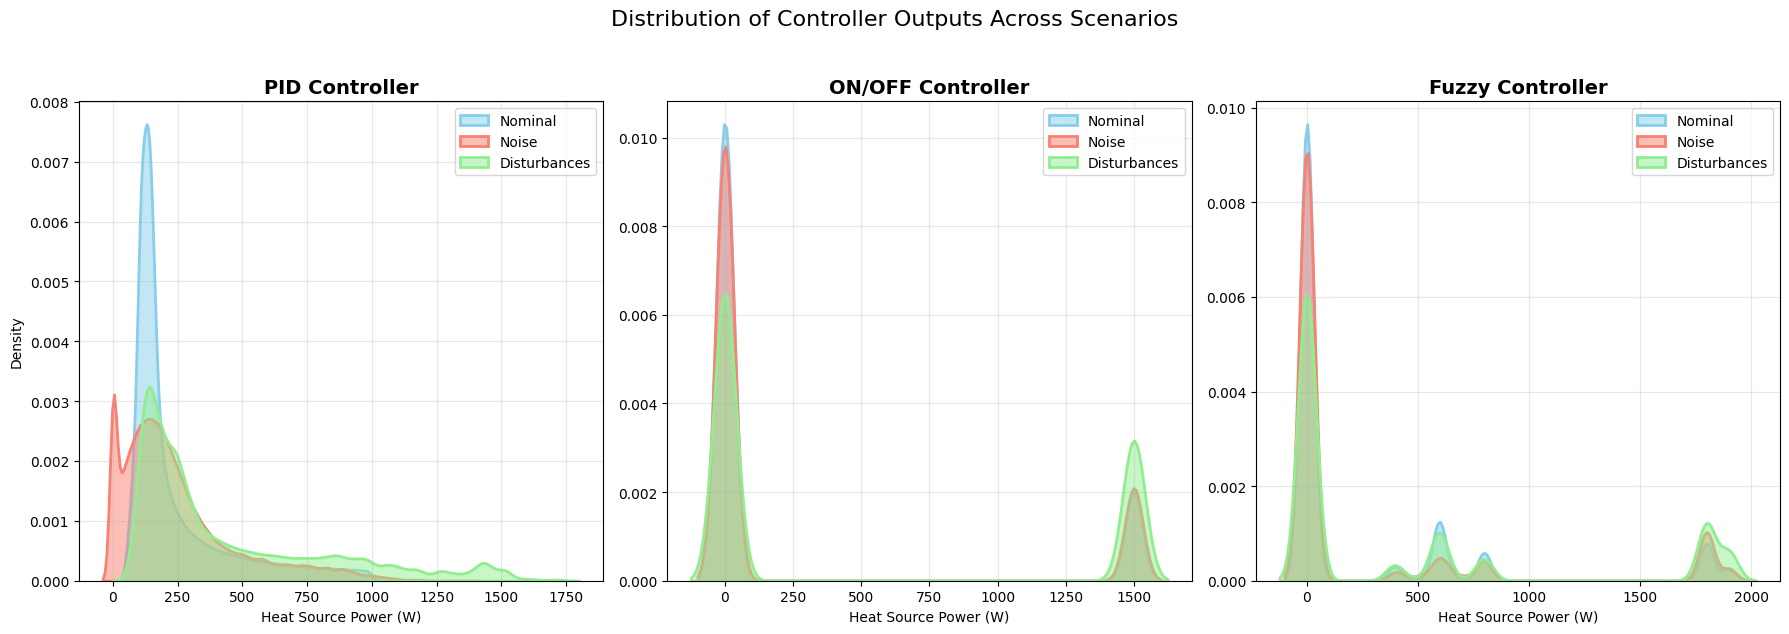

Plotting temperature outputs over time


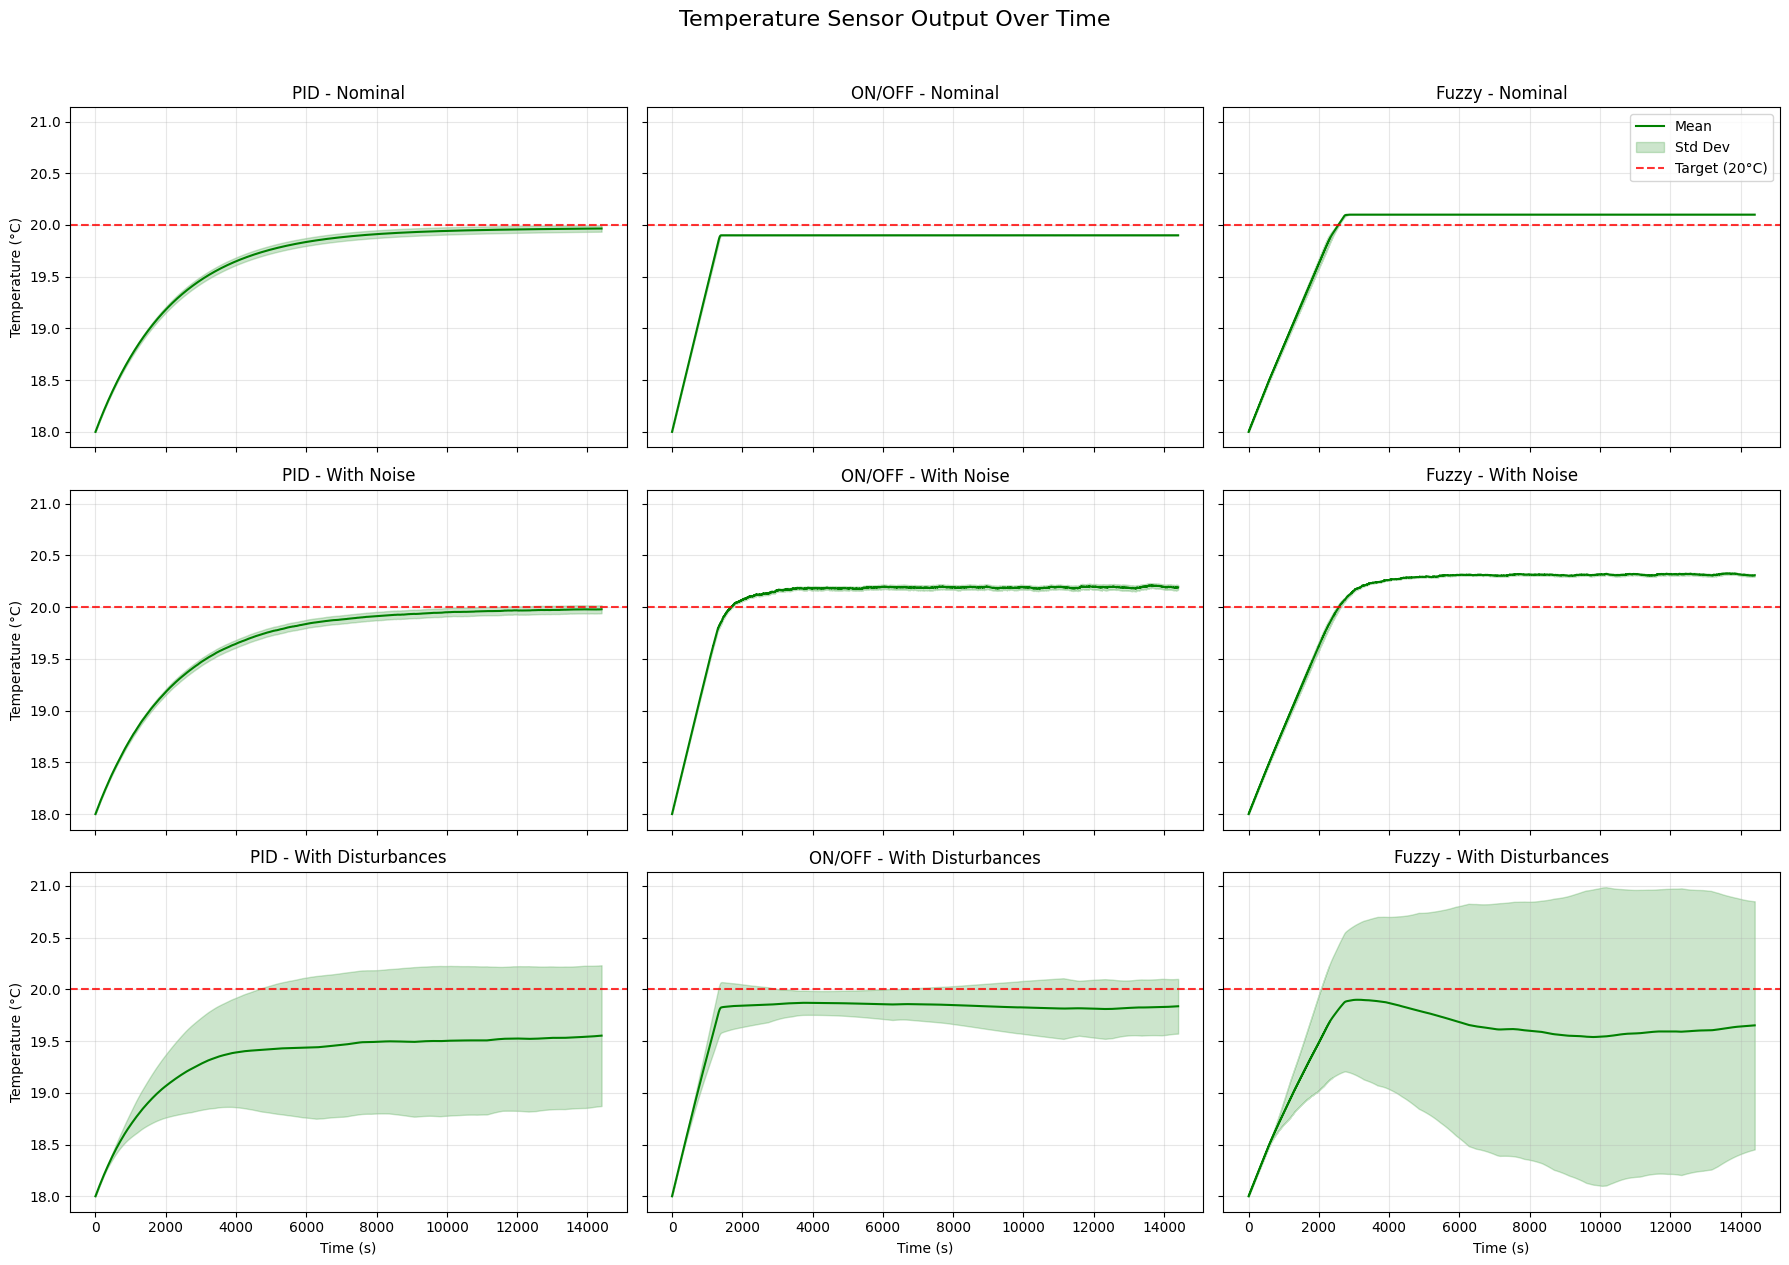

Plotting temperature distributions


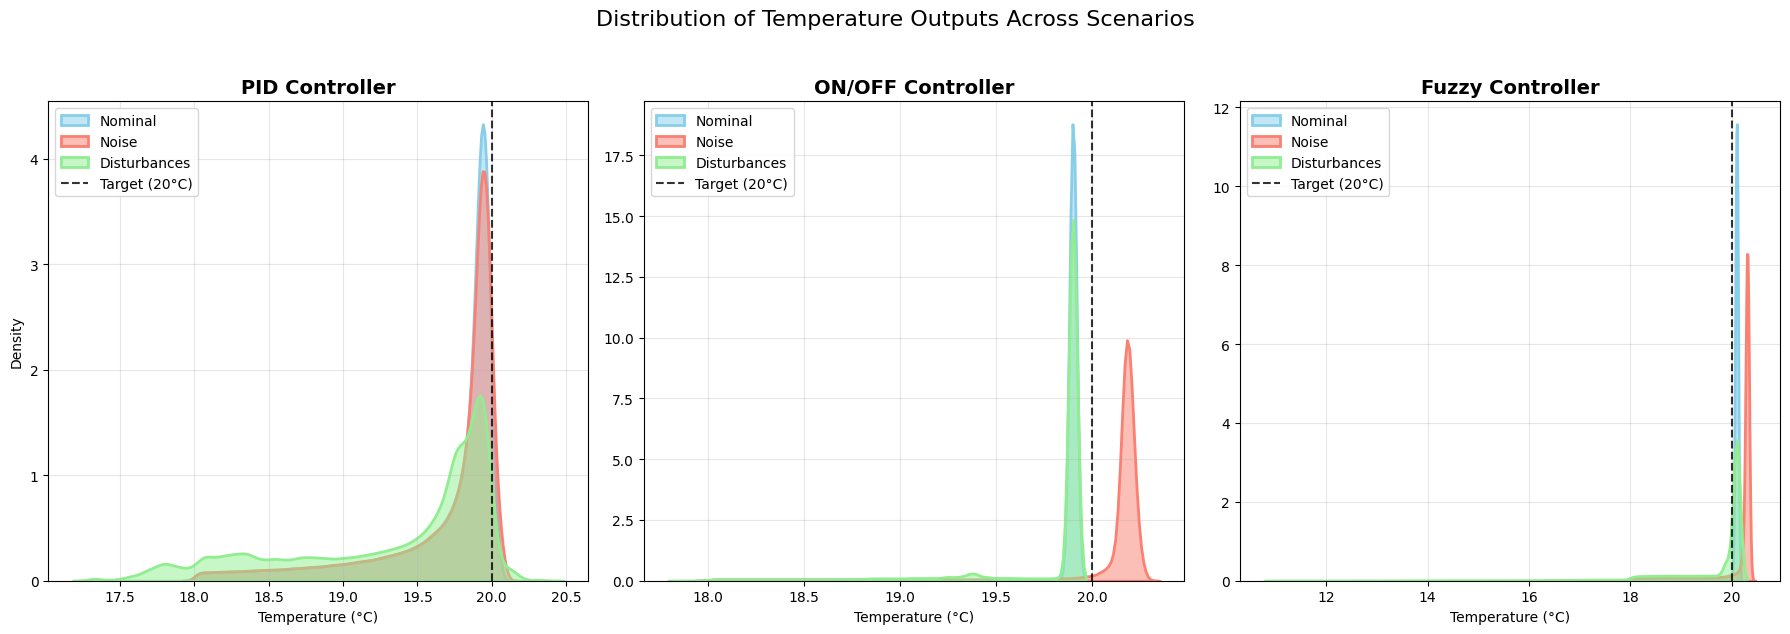

In [8]:
results = load_csv_data()

print("Plotting controller outputs over time")
plot_controller_output_over_time(results)

print("Plotting controller output distributions")
plot_output_distributions(results)

print("Plotting temperature outputs over time")
plot_temperature_output_over_time(results)

print("Plotting temperature distributions")
plot_temperature_distributions(results)